# **Général**

In [2]:
# Les library nécessaire

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import statistics as st

Un *X* dans une séquence acide aminées correspond à une aa inconnu

# **Structure Secondaire**

Il existe plusieurs possibilités pour coder la structure secondaire. A l'origine nos jeu de données utilise :

**Algorithme DSSP**

+ G = hélice 310Le carbonyle -CO du résidu i forme une liaison hydrogène avec l'amide du résidu i+3 (longueur minimale, 3 résidus) ;
+ H = hélice α. Le carbonyle -CO du résidu i forme une liaison hydrogène avec l'amide du résidu i+4 (longueur minimale, 4 résidus) ;
+ I = hélice π. Le carbonyle -CO du résidu i forme une liaison hydrogène avec l'amide du résidu i+5 (longueur minimale, 5 résidus) ;
+ T = coude fermé par une liaison hydrogène (3, 4 ou 5 résidus) ;
+ E = brin β étendu au sein d'un feuillet parallèle ou antiparallèle (longueur minimale, 2 résidus) ;
+ B = résidu isolé dans un pont β (paire isolée formant une liaison hydrogène de type feuillet β) ;
+ S = coude (sans liaison hydrogène).

---
Nous voulons seulement **3 catégories**:

+ h = Les hélices (G, H, I)
+ s = Les feuillets (E) (a voir pour B mais je pense que c'est considéré sans structure particulière)
+ b = Les coudes (T, S)

Le reste est considéré comme n'ayant pas de structure particulière et sera notifié par un espace blanc.

Si nous souhaitons moins de catégories les coudes pourront être considérés comme n'ayant pas de structure particulière.


### **Secstr**

Ce jeu de donnée de contenant 20784 protéines issues de la PDB. Il se présente sous 3 documents en format .fasta :


*   Jeu d'entrainement
*   Jeu de test
*   Jeu total

Dans chaque document, nous retrouvons la séquence d'acides aminés de chaque protéines ainsi que la correspondance en structure secondaire pour chacun de ces acides aminées (dans le code présenté ci-dessus). Chaque séquence est précédé d'une ligne commençant par '>', sur laquelle nous retrouvons les informations suivantes (séparé par ':') :

*   Nom de la protéine
*   Nom de la chaîne protéique qui suit
*   'sequence' si on retrouve la séquence ou 'secstr' si on retrouve structure secondaire sur la ligne suivante



In [ ]:
# Importer les fichiers

# Fichier complet
file_ = './SecStr/ss_cullpdb_pc40_res3.0_R1.0_d180412_filtered.txt'

# (train et test existent si on veut mais c'est le même séparé en 2 fichiers)

In [ ]:
# Mise sous forme de tableau

  # Creation
value = {'Sequences' : ['np.nan'], 'str2aire' : ['np.nan']}
datas = pd.DataFrame(data=value)

  # Formatage des donnees des proteines membranaires
for i, line in enumerate(open(file_, 'r')):

    # Nom sequence (Name)
    if line.startswith('>'):
        if 'sequence' in line:
            header = line.split('>')[1].split(':')[0]
            datas.at[header, 'Sequences'] = np.nan
            temp_seq = 1

        if 'secstr' in line:
            header = line.split('>')[1].split(':')[0]
            datas.at[header, 'str2aire'] = np.nan
            temp_seq = 0

      # Datas
    elif not line.startswith('>'):

        seq = line.split('\n')[0]

        #Sequences
        if temp_seq == 1:

            if pd.isna(datas.at[header, 'Sequences']):
              datas.at[header, 'Sequences'] = seq
            else:
              datas.at[header, 'Sequences'] = datas.at[header, 'Sequences'] + seq

        # Structure secondaire
        elif temp_seq == 0:

            if pd.isna(datas.at[header, 'str2aire']):
              datas.at[header, 'str2aire'] = seq
            else:
              datas.at[header, 'str2aire'] = datas.at[header, 'str2aire'] + seq

datas.drop(0,inplace=True)

In [ ]:
datas

Sequences                                           str2aire
12AS  MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...      HHHHHHHHHHHHHHHHHHHHHHH EEE    SEEETTSS S ...
16VP  SRMPSPPMPVPPAALFNRLLDDLGFSAGPALCTMLDTWNEDLFSAL...    S        HHHHHHHHHHHHT TTHHHHHHHHHH     STTS...
1A0A  MKRESHKHAEQARRNRLAVALHELASLIPAEWKQQNVSAAPSKATT...    TTGGGGGTHHHHHHHHHHHHHHHHTS HHHHTSS    S TTHH...
1A0I  VNIKTNPFKAVSFVESAIKKALDNAGYLIAEIKYDGVRGNICVDNT...   TT    EEEEE  HHHHHHHHHHHSSEEEEE   SEEEEEEEETT...
1A0P  QDLARIEQFLDALWLEKNLAENTLNAYRRDLSMMVEWLHHRGLTLA...   HHHHHHHHHHHHHHTT S HHHHHHHHHHHHHHHHHHHHTS  TT...
...                                                 ...                                                ...
7A3H  DNDSVVEEHGQLSISNGELVNERGEQVQLKGMSSHGLQWYGQFVNY...      HHHHH S EEETTEEE TTS B   EEEEES HHHHGGG SH...
7AHL  ADSDINIKTGTTDIGSNTTVKTGDLVTYDKENGMHKKVFYSFIDDK...   TGGGTB TTTT B TT   EEEEEEEEETTTTEEEEEEEEEE  T...
7FD1  AFVVTDNCIKCKYTDCVEVCPVDCFYEGPNFLVIHPDECIDCALCE...   EEE GGGTTT   HHHHH TT  EEE SS EEE TTT     TTG...
7ODC  MSSFTKDEFDCHILDEGFTAKDILDQKINEVSSSDDKDAFYVADLG...    EEEETTEEEEEE SS  HHHHHHHHH           EEEEEHH...
8ABP  ENLKLGFLVKQPEEPWFQTEWKFADKAGKDLGFEVIKIAVPDGEKT...    EEEEEEES TTSHHHHHHHHHHHHHHHHHTEEEEEEE  SHHHH...

[20784 rows x 2 columns]

In [ ]:
# Transformation de l'information de structure secondaire

index = list(datas.index)
for i in range(0,len(datas)):
    old = datas.at[index[i], 'str2aire']

    new = ''
    for j in old:
        if j == 'G' or j == 'H' or j == 'I':
            new = new + 'h'
        elif j == 'E':
            new = new + 's'
        elif j == 'T' or j == 'S':
            new = new + 'b'
        else:
            new = new + ' '

    datas.at[index[i], 'str2aire'] = new

In [ ]:
datas

Sequences                                           str2aire
12AS  MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...      hhhhhhhhhhhhhhhhhhhhhhh sss    bsssbbbb b ...
16VP  SRMPSPPMPVPPAALFNRLLDDLGFSAGPALCTMLDTWNEDLFSAL...    b        hhhhhhhhhhhhb bbhhhhhhhhhh     bbbb...
1A0A  MKRESHKHAEQARRNRLAVALHELASLIPAEWKQQNVSAAPSKATT...    bbhhhhhbhhhhhhhhhhhhhhhhbb hhhhbbb    b bbhh...
1A0I  VNIKTNPFKAVSFVESAIKKALDNAGYLIAEIKYDGVRGNICVDNT...   bb    sssss  hhhhhhhhhhhbbsssss   bssssssssbb...
1A0P  QDLARIEQFLDALWLEKNLAENTLNAYRRDLSMMVEWLHHRGLTLA...   hhhhhhhhhhhhhhbb b hhhhhhhhhhhhhhhhhhhhbb  bb...
...                                                 ...                                                ...
7A3H  DNDSVVEEHGQLSISNGELVNERGEQVQLKGMSSHGLQWYGQFVNY...      hhhhh b sssbbsss bbb     sssssb hhhhhhh bh...
7AHL  ADSDINIKTGTTDIGSNTTVKTGDLVTYDKENGMHKKVFYSFIDDK...   bhhhb  bbbb   bb   sssssssssbbbbssssssssss  b...
7FD1  AFVVTDNCIKCKYTDCVEVCPVDCFYEGPNFLVIHPDECIDCALCE...   sss hhhbbb   hhhhh bb  sss bb sss bbb     bbh...
7ODC  MSSFTKDEFDCHILDEGFTAKDILDQKINEVSSSDDKDAFYVADLG...    ssssbbssssss bb  hhhhhhhhh           ssssshh...
8ABP  ENLKLGFLVKQPEEPWFQTEWKFADKAGKDLGFEVIKIAVPDGEKT...    sssssssb bbbhhhhhhhhhhhhhhhhhbsssssss  bhhhh...

[20784 rows x 2 columns]

In [ ]:
# Enregistrer le tableau dans un fichier csv  (, index=False))

# Fichier complet
datas.to_csv('./SecStr/secstr_Real20784.csv')

### **Master**

Ce jeu de données a déjà été utilisé par le laboratoire lors de la construction d'un autre code. Il contient 477 210 protéines issues de la PDB.

In [ ]:
# Importer les fichiers

# Fichier complet
file_ = './master/ss.txt'

In [ ]:
# Mise sous forme de tableau (attention très long)

  # Creation
value = {'Sequences' : ['np.nan'], 'str2aire' : ['np.nan']}
datas = pd.DataFrame(data=value)

  # Formatage des donnees des proteines membranaires
for i, line in enumerate(open(file_, 'r')):

    # Nom sequence (Name)
    if line.startswith('>'):
        if 'sequence' in line:
            header = line.split('>')[1].split(':')[0] + '_' + line.split('>')[1].split(':')[1]
            datas.at[header, 'Sequences'] = np.nan
            temp_seq = 1

        if 'secstr' in line:
            header = line.split('>')[1].split(':')[0] + '_' + line.split('>')[1].split(':')[1]
            datas.at[header, 'str2aire'] = np.nan
            temp_seq = 0
        print(header)

      # Datas
    elif not line.startswith('>'):

        seq = line.split('\n')[0]

        #Sequences
        if temp_seq == 1:

            if pd.isna(datas.at[header, 'Sequences']):
              datas.at[header, 'Sequences'] = seq
            else:
              datas.at[header, 'Sequences'] = datas.at[header, 'Sequences'] + seq

        # Structure secondaire
        elif temp_seq == 0:

            if pd.isna(datas.at[header, 'str2aire']):
              datas.at[header, 'str2aire'] = seq
            else:
              datas.at[header, 'str2aire'] = datas.at[header, 'str2aire'] + seq

datas.drop(0,inplace=True)

In [ ]:
datas

Sequences                                           str2aire
101M_A  MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...      hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh hhhhhh bb...
102L_A  MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...    hhhhhhhhh  ssssss bbb ssssbbssssbbb bbbhhhhh...
102M_A  MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...      hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh hhhhhh bb...
103L_A  MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...    hhhhhhhhh  ssssss bbb ssssbbss         hhhhh...
103M_A  MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...      hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh hhhhhh bb...
...                                                   ...                                                ...
9XIA_A  MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...        hhh sssshhhhb     bb   bb    hhhhhhhhhhh...
9XIM_C  SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...       hhh sssshhhhb     bb    b    hhhhhhhhhhhb...
9XIM_A  SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...       hhh sssshhhhb     bb   bb    hhhhhhhhhhhb...
9XIM_D  SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...       hhh sssshhhhb     bb   bb    hhhhhhhhhhhb...
9XIM_B  SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...       hhh sssshhhhb     bb   bb    hhhhhhhhhhhb...

[477210 rows x 2 columns]

In [ ]:
# Transformation de l'information de structure secondaire

index = list(datas.index)
for i in range(0,len(datas)):
    old = datas.at[index[i], 'str2aire']

    new = ''
    for j in old:
        if j == 'G' or j == 'H' or j == 'I':
            new = new + 'h'
        elif j == 'E':
            new = new + 's'
        elif j == 'T' or j == 'S':
            new = new + 'b'
        else:
            new = new + ' '

    datas.at[index[i], 'str2aire'] = new

In [ ]:
datas

Sequences                                           str2aire
101M_A  MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...      hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh hhhhhh bb...
102L_A  MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...    hhhhhhhhh  ssssss bbb ssssbbssssbbb bbbhhhhh...
102M_A  MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...      hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh hhhhhh bb...
103L_A  MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...    hhhhhhhhh  ssssss bbb ssssbbss         hhhhh...
103M_A  MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...      hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh hhhhhh bb...
...                                                   ...                                                ...
9XIA_A  MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...        hhh sssshhhhb     bb   bb    hhhhhhhhhhh...
9XIM_C  SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...       hhh sssshhhhb     bb    b    hhhhhhhhhhhb...
9XIM_A  SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...       hhh sssshhhhb     bb   bb    hhhhhhhhhhhb...
9XIM_D  SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...       hhh sssshhhhb     bb   bb    hhhhhhhhhhhb...
9XIM_B  SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...       hhh sssshhhhb     bb   bb    hhhhhhhhhhhb...

[477210 rows x 2 columns]

In [ ]:
# Enregistrer le tableau dans un fichier csv  (, index=False))

# Fichier complet
datas.to_csv('./master/master_Real477210.csv')

# **Transmembranaire**

### **TMHMM**

Ce jeu de données contient 160 protéines transmembranaires et 645 protéines issues de la PDB et situées entièrement dans la cellule.
L’information sur la position transmembranaire est donnée par une séquence de *‘i’ (input) ‘o’ (output) et ‘M’ (membrane)*.

Fichier :


*   **all.txt :** Contient les 160 protéines transmembranaires et l’information sur la position dans la cellule.
*   **test_part0.txt :** contient les 16 premières protéines transmembranaires. Utilisé pour tester le fonctionnement de l’algorithme.
*   **TMHMM_645In.fasta :** Contient les 645 protéines non membranaires en format fasta.


In [ ]:
# Importer les fichiers

# Fichier test
#file_m = './Tmhmm/test_part0.txt'

# Fichier complet proteines membranaire
file_m = './Tmhmm/all.txt'

# Fichier proteines non membranaire
file_nm = './Tmhmm/TMHMM_645In.fasta'

In [ ]:
# Mise sous forme de tableau

# Creation
value = {'Sequences' : ['np.nan'], 'Membrane' : ['np.nan']}
datas = pd.DataFrame(data=value)

In [ ]:
# Formatage des donnees des proteines membranaires
for i, line in enumerate(open(file_m, 'r')):
    print(i)
    # Nom sequence (Name)
    if line.startswith('>'):
        header = line.split('>')[1].split('\n')[0]

        temp = i

    # Sequences
    elif i == (temp + 1):
        datas.at[temp, 'Sequences'] = line.split('\n')[0].split(' ')[2]
        datas = datas.rename(index = {temp:header})

    # Prediction (Membrane)
    elif line.startswith('#'):
        prediction = line.split(' ')[1].split('\n')[0]
        datas.at[header, 'Membrane'] = prediction         # i = input; M = membrane; o = output

In [ ]:
datas

Sequences                                           Membrane
FTSH_ECOLI  MAKNLILWLVIAVVLMSVFQSFGPSESNGRKVDYSTFLQEVNNDQV...  iiiiMMMMMMMMMMMMMMMMMMMMoooooooooooooooooooooo...
GAA1_CHICK  MKRLLVLCDCLWAWSLLLNALTERSYGQTSSQDELKDNTTVFTRIL...  oooooooooooooooooooooooooooooooooooooooooooooo...
GAA4_BOVIN  MVSAKKVPAIAMSFGVSFALLHFLCLAACLNESPGQNQKEEKLCPE...  oooooooooooooooooooooooooooooooooooooooooooooo...
GAB1_HUMAN  MWTVQNRESLGLLSFPVMITMVCCAHSTNEPSNMPYVKETVDRLLK...  oooooooooooooooooooooooooooooooooooooooooooooo...
GAB_LYMST   MWGIIVPFFSASLMCSLVAVVRCQQDTDHFANVTNTIDSLLKGYDI...  oooooooooooooooooooooooooooooooooooooooooooooo...
...                                                       ...                                                ...
IM23_SCHMA  MATLGTGMRCLKSCVFVLNIICLLCSLVLIGAGAYVEVKFSQYGDN...  iiiiiiiiiiiiMMMMMMMMMMMMMMMMMMMMMMMMoooooooooo...
LHB5_RHOAC          ATLTAEQSEELHKYVIDGTRVFLGLALVAHFLAFSATPWLH          iiiiiiiiiiiiiMMMMMMMMMMMMMMMMMMMMMMMooooo
PBPB_ECOLI  MAGNDREPIGRKGKPTRPVKQKVSRRRYEDDDDYDDYDDYEDEEPM...  iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii...
RHAT_ECOLI  MSNAITMGIFWHLIGAASAACFYAPFKKVKKWSWETMWSVGGIVSW...  oooMMMMMMMMMMMMMMMMMMMMMiiiiiiiiiiiiiMMMMMMMMM...
SECD_ECOLI  MLNRYPLWKYVMLIVVIVIGLLYALPNLFGEDPAVQITGARGVAAS...  iiiiiiiiiMMMMMMMMMMMMMMMMMMMMMoooooooooooooooo...

[160 rows x 2 columns]

In [ ]:
# Transformation de l'information membranaire           M = membrane; s = solution

index = list(datas.index)
for i in range(0,len(datas)):
    old = datas.at[index[i], 'Membrane']

    new = ''
    for j in old:
        if j == 'i' or j == 'o':
            new = new + 's'
        else:
            new = new + j

    datas.at[index[i], 'Membrane'] = new

In [ ]:
datas

Sequences                                           Membrane
FTSH_ECOLI  MAKNLILWLVIAVVLMSVFQSFGPSESNGRKVDYSTFLQEVNNDQV...  ssssMMMMMMMMMMMMMMMMMMMMssssssssssssssssssssss...
GAA1_CHICK  MKRLLVLCDCLWAWSLLLNALTERSYGQTSSQDELKDNTTVFTRIL...  ssssssssssssssssssssssssssssssssssssssssssssss...
GAA4_BOVIN  MVSAKKVPAIAMSFGVSFALLHFLCLAACLNESPGQNQKEEKLCPE...  ssssssssssssssssssssssssssssssssssssssssssssss...
GAB1_HUMAN  MWTVQNRESLGLLSFPVMITMVCCAHSTNEPSNMPYVKETVDRLLK...  ssssssssssssssssssssssssssssssssssssssssssssss...
GAB_LYMST   MWGIIVPFFSASLMCSLVAVVRCQQDTDHFANVTNTIDSLLKGYDI...  ssssssssssssssssssssssssssssssssssssssssssssss...
...                                                       ...                                                ...
IM23_SCHMA  MATLGTGMRCLKSCVFVLNIICLLCSLVLIGAGAYVEVKFSQYGDN...  ssssssssssssMMMMMMMMMMMMMMMMMMMMMMMMssssssssss...
LHB5_RHOAC          ATLTAEQSEELHKYVIDGTRVFLGLALVAHFLAFSATPWLH          sssssssssssssMMMMMMMMMMMMMMMMMMMMMMMsssss
PBPB_ECOLI  MAGNDREPIGRKGKPTRPVKQKVSRRRYEDDDDYDDYDDYEDEEPM...  ssssssssssssssssssssssssssssssssssssssssssssss...
RHAT_ECOLI  MSNAITMGIFWHLIGAASAACFYAPFKKVKKWSWETMWSVGGIVSW...  sssMMMMMMMMMMMMMMMMMMMMMsssssssssssssMMMMMMMMM...
SECD_ECOLI  MLNRYPLWKYVMLIVVIVIGLLYALPNLFGEDPAVQITGARGVAAS...  sssssssssMMMMMMMMMMMMMMMMMMMMMssssssssssssssss...

[160 rows x 2 columns]

In [ ]:
# Formatage des donnees des proteines non membranaires
for i, line in enumerate(open(file_nm, 'r')):

    # Nom sequence (Name)
    if line.startswith('>'):
        header = line.split('>')[1].split('\n')[0]    #.split('.')[0]  si on veut retirer la classification
        datas.at[header, 'Sequences'] = np.nan

    # Datas
    elif not line.startswith('>'):
        # Sequences
        seq = line.split('\n')[0]
        # Prediction (Membrane)
        prediction = 's' * len(seq)

        if pd.isna(datas.at[header, 'Sequences']):
          datas.at[header, 'Sequences'] = seq
          datas.at[header, 'Membrane'] = prediction         # M = membrane; s = solution
        else:
          datas.at[header, 'Sequences'] = datas.at[header, 'Sequences'] + seq
          datas.at[header, 'Membrane'] = datas.at[header, 'Membrane'] + prediction         # M = membrane; s = solution

datas.drop(0,inplace=True)

In [ ]:
datas

Sequences                                           Membrane
1AD2._ RIBOSOMAL                  KRYRALLEKVDPNKIYTIDEAAHLVKELATAKFDETVEVHAKLGID...  ssssssssssssssssssssssssssssssssssssssssssssss...
1AKO._ NUCLEASE                   MKFVSFNINGLRARPHQLEAIVEKHQPDVIGLQETKVHDDMFPLEE...  ssssssssssssssssssssssssssssssssssssssssssssss...
1ALO._ OXIDOREDUCTASE             MIQKVITVNGIEQNLFVDAEALLSDVLRQQLGLTGVKVGCEQGQCG...  ssssssssssssssssssssssssssssssssssssssssssssss...
1AMP._ HYDROLASE(AMINOPEPTIDASE)  MPPITQQATVTAWLPQVDASQITGTISSLESFTNRFYTTTSGAQAS...  ssssssssssssssssssssssssssssssssssssssssssssss...
1ARU._ PEROXIDASE                 SVTCPGGQSTSNSQCCVWFDVLDDLQTNFYQGSKCESPVRKILRIV...  ssssssssssssssssssssssssssssssssssssssssssssss...
...                                                                             ...                                                ...
1TGX.A CYTOTOXIN                  LKCNQLIPPFWKTCPKGKNLCYKMTMRAAPMVPVKRGCIDVCPKSS...  ssssssssssssssssssssssssssssssssssssssssssssss...
1URN.A COMPLEX                    AVPETRPNHTIYINNLNEKIKKDELKKSLHAIFSRFGQILDILVSR...  ssssssssssssssssssssssssssssssssssssssssssssss...
1WHT.A SERINE                     GHAADRIARLPGQPAVDFDMYSGYITVDEGAGRSLFYLLQEAPEDA...  ssssssssssssssssssssssssssssssssssssssssssssss...
2BBK.H ELECTRON                   DEPRILEAPAPDARRVYVNDPAHFAAVTQQFVIDGEAGRVIGMIDG...  ssssssssssssssssssssssssssssssssssssssssssssss...
2SIC.I COMPLEX                    YAPSALVLTVGKGVSATTAAPERAVTLTCAPGPSGTHPAAGSACAD...  ssssssssssssssssssssssssssssssssssssssssssssss...

[645 rows x 2 columns]

In [ ]:
# Enregistrer les prot membranaire en format fasta (nous ne l'utilisons pas dans la construction de notre jeu de données)

# Fichier test
#output = './Tmhmm/TMHMM_16TMb.fasta'

# Fichier complet proteines membranaire
output = './Tmhmm/TMHMM_160TMb.fasta'

# Fichier complet
#output = './Tmhmm/TMHMM_805.fasta'

index = list(datas.index)
with open(output,'w+') as fichier:
    for i in range(0,len(datas)):
        id = '>' + index[i] + '\n'
        fichier.write(id)
        fichier.write(datas.at[index[i], 'Sequences'])
        fichier.write('\n')


In [ ]:
# Enregistrer le tableau dans un fichier csv  (, index=False))

# Fichier test
#datas.to_csv('./Tmhmm/TMHMM_Real16TMb.csv')

# Fichier complet proteines membranaire
#datas.to_csv('./Tmhmm/TMHMM_Real160TMb.csv')

# Fichier proteines non membranaire
datas.to_csv('./Tmhmm/TMHMM_Real645In.csv')

# Fichier contenant toutes les proteines
#datas.to_csv('./Tmhmm/TMHMM_Real805.csv')

### **TOPCONS2**

Ce jeu de données a été utilisé par Bepler and Berger. Il contient 286 protéines transmembrannaires et 2.927 protéines entièrement située dans la cellule issues d'UniProt.
L’information sur la position transmembranaire est donnée par une séquence de *‘I’ (input) ‘O’ (output) et ‘M’ (membrane)*.


Fichier :

*   **Globular.3line :** Contient les 2.927 protéines non transmembranaires.
*   **Globular+SP.3line :** Contient les mêmes information que le fichier précédent mais les séquences contiennent encore les peptides signals.
*   **TM.3line :** Contient les 286 protéines transmembranaires et l’information sur la position dans la cellule.
*   **TM+SP.3line :** Contient les mêmes information que le fichier précédent mais les séquences contiennent encore les peptides signals.

In [ ]:
# Importer les fichiers

# Fichier Globular
file_glob = './TopConS2/Globular.3line'

# Fichier TM
file_tm = './TopConS2/TM.3line'

In [ ]:
# Mise sous forme de tableau

# Creation
value = {'Sequences' : ['np.nan'], 'Membrane' : ['np.nan']}
datas = pd.DataFrame(data=value)

In [ ]:
# Formatage des donnees des proteines membranaires
for i, line in enumerate(open(file_tm, 'r')):

    # Nom sequence (Name)
    if line.startswith('>'):
        header = line.split('>')[1].split('\n')[0]    #.split('|')[0]

        temp = i

    # Sequences
    elif i == (temp + 1):
        datas.at[temp, 'Sequences'] = line.split('\n')[0]
        datas = datas.rename(index = {temp:header})

    # Prediction (Membrane)
    elif i == (temp + 2):
        prediction = line.split('\n')[0]
        datas.at[header, 'Membrane'] = prediction         # i = input; M = membrane; o = output

In [ ]:
datas

Sequences                                           Membrane
A2RI47|4popA  MSNSKFNVRLLTEIAFMAALAFIISLIPNTVYGWIIVEIACIPILL...  IIIIIIIIIIIMMMMMMMMMMMMMMMMMMMMOOOOMMMMMMMMMMM...
A2RMJ9|4dveA  MTNNQKVKTLTYSAFMTAFIIILGFLPGIPIGFIPVPIILQNMGIM...  IIIIIIIIIIIIIMMMMMMMMMMMMMMMMOOOOOOOOMMMMMMMMM...
A3CWV0|4hygA  MQIRDWLPLLGMPLMLLFVQIIAIVLVMPMQAAGLVAFEDPESVAN...  IIIIIIIIIIIMMMMMMMMMMMMMMMMOOOOOOOOOOOOOOOOOOO...
A5GZW8|1zoyD  MATLWRLSVLCGARGGGALVLRTSVVRPAHVSAFLQDRHTPGWCGV...  IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
A5U127|2oarA  MLKGFKEFLARGNIVDLAVAVVIGTAFTALVTKFTDSIITPLINRI...  IIIIIIIIIIIIIIIIIIIMMMMMMMMMMMMMMMMMMMMMMMMMMM...
...                                                         ...                                                ...
P25103|2ks9A  MDNVLPVDSDLSPNISTNTSEPNQFVQPAWQIVLWAAAYTVIVVTS...  OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMM...
P23230|1q90D  MSVTKKPDLSDPVLKAKLAKGMGHNTYGEPAWPNDLLYMFPVVILG...  IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIMMMMMMMMMM...
Q50541|3chxF  MFTSKSGGAIGPFHSVAEAAGCVKTTDWMFLTLLFLAVLGGYHIHF...  IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIMMMMMMMMMMMMM...
C6E9S5|3rkoM  MLLPWLILIPFIGGFLCWQTERFGVKVPRWIALITMGLTLALSLQL...  OMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIMMMMMMMMMMMMMMM...
D2ZZC1|4qtnB  MQYGMDSFGLRGIPHQVFIKKKEGKIMSLAWWKRELFGGWTHFEAV...  IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIMMMMMM...

[286 rows x 2 columns]

In [ ]:
# Formatage des donnees des proteines non membranaires
for i, line in enumerate(open(file_glob, 'r')):

    # Nom sequence (Name)
    if line.startswith('>'):
        header = line.split('>')[1].split('\n')[0]    #.split('|')[0]

        temp = i

    # Sequences
    elif i == (temp + 1):
        datas.at[temp, 'Sequences'] = line.split('\n')[0]
        datas = datas.rename(index = {temp:header})

    # Prediction (Membrane)
    elif i == (temp + 2):
        prediction = line.split('\n')[0]
        datas.at[header, 'Membrane'] = prediction         # i = input; M = membrane; o = output

In [ ]:
datas

Sequences                                           Membrane
P38448  MKNWKTSAEQILTAGPVVPVIVINKLEHAVPMAKALVAGGVRVLEL...  IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
Q00594  MLGQMMRNQLVIGSLVEHAARYHGAREVVSVETSGEVTRSCWKEVE...  IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
P27888  MLNINFVNEESSTNQGLIVFIDEQLKLNNNLIALDQQHYELISKTI...  IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
P0CL03  MLPDKGWLVEARRVPSPHYDCRPDDEKPSLLVVHNISLPPGEFGGP...  IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
P15034  MSEISRQEFQRRRQALVEQMQPGSAALIFAAPEVTRSADSEYPYRQ...  IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
...                                                   ...                                                ...
Q9ZPY8  MNMSDLGWDDEDKSVVSAVLGHLASDFLRANSNSNQNLFLVMGTDD...  IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
Q9ZR39  MRDYEGNGVDIDNNGASPYSQHISRDHENERDSSRSRDKERDKGRD...  IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
Q9ZV65  MSQSNMVPVANNGDNNNDNENNNNNNNNGGTDNTNAGNDSGDQDFD...  IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
Q9ZWA1  MDVVCTEHQMRKPTVEIPPRKLLLSSKSFPSDSSSPRSPRKHNWNK...  IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
Q9ZWA6  MTTEDQTISSSGGYVQSSSTTDHVDHHHHDQHESLNPPLVKKKRNL...  IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...

[2927 rows x 2 columns]

In [ ]:
# Transformation de l'information membranaire           M = membrane; s = solution

index = list(datas.index)
for i in range(0,len(datas)):
    old = datas.at[index[i], 'Membrane']

    new = ''
    for j in old:
        if j == 'I' or j == 'O':
            new = new + 's'
        else:
            new = new + j

    datas.at[index[i], 'Membrane'] = new

In [ ]:
datas

Sequences                                           Membrane
A2RI47|4popA  MSNSKFNVRLLTEIAFMAALAFIISLIPNTVYGWIIVEIACIPILL...  sssssssssssMMMMMMMMMMMMMMMMMMMMssssMMMMMMMMMMM...
A2RMJ9|4dveA  MTNNQKVKTLTYSAFMTAFIIILGFLPGIPIGFIPVPIILQNMGIM...  sssssssssssssMMMMMMMMMMMMMMMMssssssssMMMMMMMMM...
A3CWV0|4hygA  MQIRDWLPLLGMPLMLLFVQIIAIVLVMPMQAAGLVAFEDPESVAN...  sssssssssssMMMMMMMMMMMMMMMMsssssssssssssssssss...
A5GZW8|1zoyD  MATLWRLSVLCGARGGGALVLRTSVVRPAHVSAFLQDRHTPGWCGV...  ssssssssssssssssssssssssssssssssssssssssssssss...
A5U127|2oarA  MLKGFKEFLARGNIVDLAVAVVIGTAFTALVTKFTDSIITPLINRI...  sssssssssssssssssssMMMMMMMMMMMMMMMMMMMMMMMMMMM...
...                                                         ...                                                ...
P25103|2ks9A  MDNVLPVDSDLSPNISTNTSEPNQFVQPAWQIVLWAAAYTVIVVTS...  sssssssssssssssssssssssssssssssssMMMMMMMMMMMMM...
P23230|1q90D  MSVTKKPDLSDPVLKAKLAKGMGHNTYGEPAWPNDLLYMFPVVILG...  ssssssssssssssssssssssssssssssssssssMMMMMMMMMM...
Q50541|3chxF  MFTSKSGGAIGPFHSVAEAAGCVKTTDWMFLTLLFLAVLGGYHIHF...  sssssssssssssssssssssssssssssssssMMMMMMMMMMMMM...
C6E9S5|3rkoM  MLLPWLILIPFIGGFLCWQTERFGVKVPRWIALITMGLTLALSLQL...  sMMMMMMMMMMMMMMMMssssssssssssssMMMMMMMMMMMMMMM...
D2ZZC1|4qtnB  MQYGMDSFGLRGIPHQVFIKKKEGKIMSLAWWKRELFGGWTHFEAV...  ssssssssssssssssssssssssssssssssssssssssMMMMMM...

[286 rows x 2 columns]

In [ ]:
# Enregistrer le tableau dans un fichier csv  (, index=False))

# Fichier globular
datas.to_csv('./TopConS2/TOPCONS2_Real2927In.csv')

# Fichier tm
#datas.to_csv('./TopConS2/TOPCONS2_Real286TMb.csv')

# Fichier contenant toutes les proteines
#datas.to_csv('./TopConS2/TOPCONS2_Real3213.csv')

# **Taille de séquences**

Nous regardons les histogrammes des tailles de séquences afin de connaître la répartition et de choisir la taille limite des séquences que nous utiliserons.

### **General**

In [ ]:
# Importer les fichiers

# Fichier Secstr
Sec = pd.read_csv('./SecStr/secstr_Real20784.csv',index_col=0, parse_dates=False)

# Fichier Master
Mat = pd.read_csv('./master/master_Real477210.csv',index_col=0, parse_dates=False)

# Fichier TMHMM
Tmhmm = pd.read_csv('./Tmhmm/TMHMM_Real805.csv',index_col=0, parse_dates=False)

# Fichier TOPCONS2
TOP = pd.read_csv('./TopConS2/TOPCONS2_Real3213.csv',index_col=0, parse_dates=False)


In [ ]:
Sec

Sequences                                           str2aire
12AS  MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...      hhhhhhhhhhhhhhhhhhhhhhh sss    bsssbbbb b ...
16VP  SRMPSPPMPVPPAALFNRLLDDLGFSAGPALCTMLDTWNEDLFSAL...    b        hhhhhhhhhhhhb bbhhhhhhhhhh     bbbb...
1A0A  MKRESHKHAEQARRNRLAVALHELASLIPAEWKQQNVSAAPSKATT...    bbhhhhhbhhhhhhhhhhhhhhhhbb hhhhbbb    b bbhh...
1A0I  VNIKTNPFKAVSFVESAIKKALDNAGYLIAEIKYDGVRGNICVDNT...   bb    sssss  hhhhhhhhhhhbbsssss   bssssssssbb...
1A0P  QDLARIEQFLDALWLEKNLAENTLNAYRRDLSMMVEWLHHRGLTLA...   hhhhhhhhhhhhhhbb b hhhhhhhhhhhhhhhhhhhhbb  bb...
...                                                 ...                                                ...
7A3H  DNDSVVEEHGQLSISNGELVNERGEQVQLKGMSSHGLQWYGQFVNY...      hhhhh b sssbbsss bbb     sssssb hhhhhhh bh...
7AHL  ADSDINIKTGTTDIGSNTTVKTGDLVTYDKENGMHKKVFYSFIDDK...   bhhhb  bbbb   bb   sssssssssbbbbssssssssss  b...
7FD1  AFVVTDNCIKCKYTDCVEVCPVDCFYEGPNFLVIHPDECIDCALCE...   sss hhhbbb   hhhhh bb  sss bb sss bbb     bbh...
7ODC  MSSFTKDEFDCHILDEGFTAKDILDQKINEVSSSDDKDAFYVADLG...    ssssbbssssss bb  hhhhhhhhh           ssssshh...
8ABP  ENLKLGFLVKQPEEPWFQTEWKFADKAGKDLGFEVIKIAVPDGEKT...    sssssssb bbbhhhhhhhhhhhhhhhhhbsssssss  bhhhh...

[20784 rows x 2 columns]

In [ ]:
Mat

In [ ]:
Tmhmm

In [ ]:
TOP

### **Structure Secondaire**

In [ ]:
# Récupération longueur de séquence Secstr

index = list(Sec.index)
seq_size_sec = []
for i in range(0,len(Sec)):
    seq_size_sec.append(len(Sec.at[index[i], 'Sequences']))

In [ ]:
print('taille :', len(seq_size_sec))
print('min :', min(seq_size_sec))
print('mediane :', st.median(seq_size_sec))
print('mean :', st.mean(seq_size_sec))
print('max :', max(seq_size_sec))

taille : 20784
min : 5
mediane : 231.0
mean : 262.8368937644342
max : 3245


In [ ]:
# Récupération longueur de séquence Master    (attention long)

index = list(Mat.index)
seq_size_mat = []
for i in range(0,len(Mat)):
    seq_size_mat.append(len(Mat.at[index[i], 'Sequences']))

In [ ]:
print('taille :', len(seq_size_mat))
print('min :', min(seq_size_mat))
print('mediane :', st.median(seq_size_mat))
print('mean :', st.mean(seq_size_mat))
print('max :', max(seq_size_mat))

taille : 477210
min : 2
mediane : 229.0
mean : 268.7177909096624
max : 5037


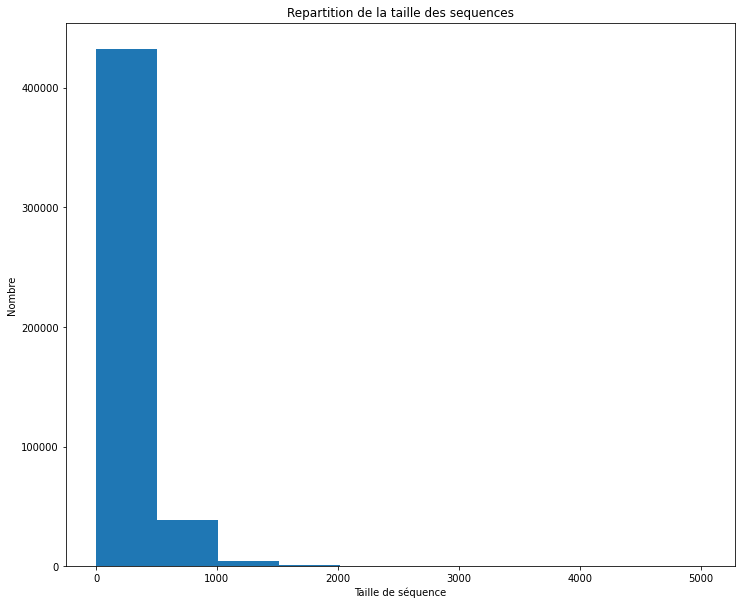

In [ ]:
# Histogramm
plt.figure(figsize=(12,10))
plt.hist(seq_size_mat)
plt.title("Repartition de la taille des sequences")
plt.xlabel("Taille de séquence")
plt.ylabel("Nombre")
plt.show()

In [ ]:
# Combinaison des listes de longeurs que l'on souhaite observer

  # Secstr seul
#seq_size = seq_size_sec

  # Master seul
#seq_size = seq_size_sec

  # Tous
seq_size = seq_size_sec
seq_size.extend(seq_size_mat)

In [ ]:
print('taille :', len(seq_size))
print('min :', min(seq_size))
print('mediane :', st.median(seq_size))
print('mean :', st.mean(seq_size))
print('max :', max(seq_size))

In [ ]:
# Histogramm
plt.figure(figsize=(12,10))
plt.hist(seq_size)
plt.title("Repartition de la taille des sequences")
plt.xlabel("Taille de séquence")
plt.ylabel("Nombre")
plt.show()

### **Transmembrannaire**

In [ ]:
# Récupération longueur de séquence TMHMM

index = list(Tmhmm.index)
seq_size_tmh = []
for i in range(0,len(Tmhmm)):
    seq_size_tmh.append(len(Tmhmm.at[index[i], 'Sequences']))

In [ ]:
print('taille :', len(seq_size_tmh))
print('min :', min(seq_size_tmh))
print('mediane :', st.median(seq_size_tmh))
print('mean :', st.mean(seq_size_tmh))
print('max :', max(seq_size_tmh))

taille : 805
min : 29
mediane : 188
mean : 239.85714285714286
max : 1827


In [ ]:
# Récupération longueur de séquence TOPCONS2

index = list(TOP.index)
seq_size_top = []
for i in range(0,len(TOP)):
    seq_size_top.append(len(TOP.at[index[i], 'Sequences']))

In [ ]:
print('taille :', len(seq_size_top))
print('min :', min(seq_size_top))
print('mediane :', st.median(seq_size_top))
print('mean :', st.mean(seq_size_top))
print('max :', max(seq_size_top))

taille : 3213
min : 45
mediane : 433
mean : 555.0501089324619
max : 5890


In [ ]:
# Combinaison des listes de longeurs que l'on souhaite observer

  # TMHMM seul
#seq_size = seq_size_tmh

  # TOPCONS2 seul
#seq_size = seq_size_top

  # Tous
seq_size = seq_size_tmh
seq_size.extend(seq_size_top)

In [ ]:
print('taille :', len(seq_size))
print('min :', min(seq_size))
print('mediane :', st.median(seq_size))
print('mean :', st.mean(seq_size))
print('max :', max(seq_size))

taille : 4018
min : 29
mediane : 381.0
mean : 491.9016923842708
max : 5890


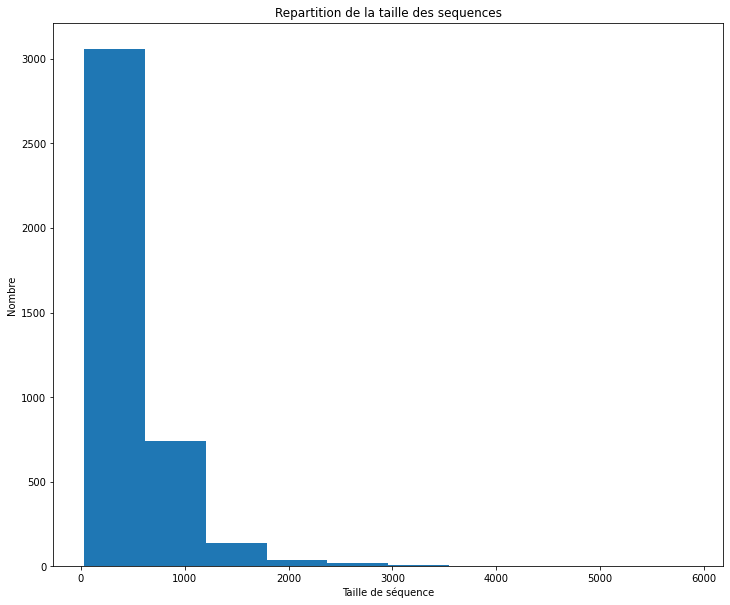

In [ ]:
# Histogramm

plt.figure(figsize=(12,10))
plt.hist(seq_size)
plt.title("Repartition de la taille des sequences")
plt.xlabel("Taille de séquence")
plt.ylabel("Nombre")
plt.show()

# **Combine**

### **General**

In [ ]:
# Importer les fichiers

# Fichier Secstr
Sec = pd.read_csv('./SecStr/secstr_Real20784.csv',index_col=0, parse_dates=False)

# Fichier Master
Mat = pd.read_csv('./master/master_Real477210.csv',index_col=0, parse_dates=False)

# Fichier TMHMM
Tmhmm = pd.read_csv('./Tmhmm/TMHMM_Real805.csv',index_col=0, parse_dates=False)

# Fichier TOPCONS2
TOP = pd.read_csv('./TopConS2/TOPCONS2_Real3213.csv',index_col=0, parse_dates=False)

### **Structure secondaire**

In [ ]:
# Concatenations des donnes
datas = pd.concat([Sec,Mat], ignore_index=False)

# Recuperations des index
index = list(Sec.index)
result = list(Mat.index)
Smat = len(result)

# Couper le numero de chaine
tmp = []
for i in result:
    tmp.append(i.split('_')[0])
tmp = set(tmp)

In [ ]:
# Vérification des doublons

for j in index:
    if j not in tmp:
      tmp.append(j)
      result.append(j)

del tmp

print("Nombre total d'élément :", len(index)+Smat)
print("Nombre total d'élément unique :", len(result))
print("Nombre total d'élément doublons :", len(index)+Smat-len(result))

Nombre total d'élément : 497994
Nombre total d'élément unique : 477210
Nombre total d'élément doublons : 20784


Il semblerait que le jeu de données Secstr soit entièrement contenu dans le jeu de donnée master.

In [ ]:
# Cellule optionnel (si on veut changer la taille minimal des sequences)

# Fichier
datas = pd.read_csv('./Used/setr2aire_477210.csv',index_col=0, parse_dates=False) 

# Renomer
result = list(datas.index())

In [ ]:
# Tableau final

  # Taille minimal des sequences
min = 100

  # Creation
value = {'Sequences' : ['np.nan'], 'Membrane' : ['np.nan']}
dat_end = pd.DataFrame(data=value)

  # Ajout
for header in result:
    size = len(datas.at[header, 'Sequences'])
    if size >= min:
        dat_end.at[header, 'Sequences'] = datas.at[header, 'Sequences']
        dat_end.at[header, 'str2aire'] = datas.at[header, 'str2aire']

dat_end.drop(0,inplace=True)

In [ ]:
print("Nombre total d'élément unique :", len(list(datas.index)))
print("Nombre total d'élément supérieur a", min, ":", len(list(dat_end.index)))

In [ ]:
dat_end

In [ ]:
# Enregistrer le tableau dans un fichier csv  (, index=False))

# Fichier complet
datas.to_csv('./Used/setr2aire_477210.csv')

### **Transmembrannaire**

In [ ]:
# Concatenations des donnes
datas = pd.concat([Tmhmm,TOP], ignore_index=False)

# Recuperations des index
index = list(datas.index)

In [ ]:
datas

Sequences                                           Membrane
FTSH_ECOLI  MAKNLILWLVIAVVLMSVFQSFGPSESNGRKVDYSTFLQEVNNDQV...  ssssMMMMMMMMMMMMMMMMMMMMssssssssssssssssssssss...
GAA1_CHICK  MKRLLVLCDCLWAWSLLLNALTERSYGQTSSQDELKDNTTVFTRIL...  ssssssssssssssssssssssssssssssssssssssssssssss...
GAA4_BOVIN  MVSAKKVPAIAMSFGVSFALLHFLCLAACLNESPGQNQKEEKLCPE...  ssssssssssssssssssssssssssssssssssssssssssssss...
GAB1_HUMAN  MWTVQNRESLGLLSFPVMITMVCCAHSTNEPSNMPYVKETVDRLLK...  ssssssssssssssssssssssssssssssssssssssssssssss...
GAB_LYMST   MWGIIVPFFSASLMCSLVAVVRCQQDTDHFANVTNTIDSLLKGYDI...  ssssssssssssssssssssssssssssssssssssssssssssss...
...                                                       ...                                                ...
Q9ZPY8      MNMSDLGWDDEDKSVVSAVLGHLASDFLRANSNSNQNLFLVMGTDD...  ssssssssssssssssssssssssssssssssssssssssssssss...
Q9ZR39      MRDYEGNGVDIDNNGASPYSQHISRDHENERDSSRSRDKERDKGRD...  ssssssssssssssssssssssssssssssssssssssssssssss...
Q9ZV65      MSQSNMVPVANNGDNNNDNENNNNNNNNGGTDNTNAGNDSGDQDFD...  ssssssssssssssssssssssssssssssssssssssssssssss...
Q9ZWA1      MDVVCTEHQMRKPTVEIPPRKLLLSSKSFPSDSSSPRSPRKHNWNK...  ssssssssssssssssssssssssssssssssssssssssssssss...
Q9ZWA6      MTTEDQTISSSGGYVQSSSTTDHVDHHHHDQHESLNPPLVKKKRNL...  ssssssssssssssssssssssssssssssssssssssssssssss...

[4018 rows x 2 columns]

In [ ]:
# Vérification des doublons

result = []

for j in index:
    if j not in result:
      result.append(j)

print("Nombre total d'élément :", len(index))
print("Nombre total d'élément unique :", len(result))
print("Nombre total d'élément doublons :", len(index)-len(result))

Nombre total d'élément : 4018
Nombre total d'élément unique : 4018
Nombre total d'élément doublons : 0


In [ ]:
# Cellule optionnel (si on veut changer la taille minimal des sequences)

# Fichier
datas = pd.read_csv('./Used/TMb_3782.csv',index_col=0, parse_dates=False) 

# Renomer
result = list(datas.index())

In [ ]:
# Tableau final

  # Taille minimal des sequences
min = 100

  # Creation
value = {'Sequences' : ['np.nan'], 'Membrane' : ['np.nan']}
dat_end = pd.DataFrame(data=value)

  # Ajout
for header in result:
    size = len(datas.at[header, 'Sequences'])
    if size >= min:
        dat_end.at[header, 'Sequences'] = datas.at[header, 'Sequences']
        dat_end.at[header, 'Membrane'] = datas.at[header, 'Membrane']

dat_end.drop(0,inplace=True)

In [ ]:
print("Nombre total d'élément unique :", len(list(datas.index)))
print("Nombre total d'élément supérieur a", min, ":", len(list(dat_end.index)))

Nombre total d'élément unique : 4018
Nombre total d'élément supérieur a 100 : 3782


In [ ]:
dat_end

Sequences                                           Membrane
FTSH_ECOLI  MAKNLILWLVIAVVLMSVFQSFGPSESNGRKVDYSTFLQEVNNDQV...  ssssMMMMMMMMMMMMMMMMMMMMssssssssssssssssssssss...
GAA1_CHICK  MKRLLVLCDCLWAWSLLLNALTERSYGQTSSQDELKDNTTVFTRIL...  ssssssssssssssssssssssssssssssssssssssssssssss...
GAA4_BOVIN  MVSAKKVPAIAMSFGVSFALLHFLCLAACLNESPGQNQKEEKLCPE...  ssssssssssssssssssssssssssssssssssssssssssssss...
GAB1_HUMAN  MWTVQNRESLGLLSFPVMITMVCCAHSTNEPSNMPYVKETVDRLLK...  ssssssssssssssssssssssssssssssssssssssssssssss...
GAB_LYMST   MWGIIVPFFSASLMCSLVAVVRCQQDTDHFANVTNTIDSLLKGYDI...  ssssssssssssssssssssssssssssssssssssssssssssss...
...                                                       ...                                                ...
Q9ZPY8      MNMSDLGWDDEDKSVVSAVLGHLASDFLRANSNSNQNLFLVMGTDD...  ssssssssssssssssssssssssssssssssssssssssssssss...
Q9ZR39      MRDYEGNGVDIDNNGASPYSQHISRDHENERDSSRSRDKERDKGRD...  ssssssssssssssssssssssssssssssssssssssssssssss...
Q9ZV65      MSQSNMVPVANNGDNNNDNENNNNNNNNGGTDNTNAGNDSGDQDFD...  ssssssssssssssssssssssssssssssssssssssssssssss...
Q9ZWA1      MDVVCTEHQMRKPTVEIPPRKLLLSSKSFPSDSSSPRSPRKHNWNK...  ssssssssssssssssssssssssssssssssssssssssssssss...
Q9ZWA6      MTTEDQTISSSGGYVQSSSTTDHVDHHHHDQHESLNPPLVKKKRNL...  ssssssssssssssssssssssssssssssssssssssssssssss...

[3782 rows x 2 columns]

In [ ]:
# Enregistrer le tableau dans un fichier csv  (, index=False))

# Fichier complet
datas.to_csv('./Used/TMb_3782.csv')

#### **Equilibrage du dataset**

Le dataset final que l'on obtient n'est pas parfaitement équilibré mais s'en rapproche plus que l'original.

Il peut introduire un léger biais dans l'IA du aux séquences répétitives.

In [5]:
# Cellule optionnel (si on a besoin de recharger le dataset transmembrannaire final)

# Fichier
datas = pd.read_csv('./Used/TMb_3782.csv',index_col=0, parse_dates=False)

In [6]:
# Separation Transmembrannaire et interne

index = list(datas.index)

  # Creation
value = {'Sequences' : ['np.nan'], 'Membrane' : ['np.nan']}
dat_tmb = pd.DataFrame(data=value)
dat_in = pd.DataFrame(data=value)

  # Ajout
for i in index:
    mbn = datas.at[i, 'Membrane']
    if 'M' in mbn:
        dat_tmb.at[i, 'Sequences'] = datas.at[i, 'Sequences']
        dat_tmb.at[i, 'Membrane'] = datas.at[i, 'Membrane']
    else:
        dat_in.at[i, 'Sequences'] = datas.at[i, 'Sequences']
        dat_in.at[i, 'Membrane'] = datas.at[i, 'Membrane']

dat_tmb.drop(0,inplace=True)
dat_in.drop(0,inplace=True)

In [7]:
print("Nombre total d'élément :", len(index))
print("Nombre total d'élément transmembrannaire :", len(list(dat_tmb.index)))
print("Nombre total d'élément interne :", len(list(dat_in.index)))

Nombre total d'élément : 4018
Nombre total d'élément transmembrannaire : 446
Nombre total d'élément interne : 3572


In [8]:
# Multiplication des transmembrannaires

  # Creation
value = {'Sequences' : ['np.nan'], 'Membrane' : ['np.nan']}
new = pd.DataFrame(data=value)

  # Multiplication
for i in range(len(list(dat_in.index))//len(list(dat_tmb.index))):
    new = pd.concat([new,dat_tmb], ignore_index=False)

new.drop(0,inplace=True)

print("Nombre d'élément transmembrannaire :", len(list(new.index)))

Nombre d'élément transmembrannaire : 3568


In [9]:
# Concatenation des 2 dataframe

datas = pd.concat([new,dat_in], ignore_index=False)

In [10]:
datas

Sequences                                           Membrane
FTSH_ECOLI  MAKNLILWLVIAVVLMSVFQSFGPSESNGRKVDYSTFLQEVNNDQV...  ssssMMMMMMMMMMMMMMMMMMMMssssssssssssssssssssss...
GAA1_CHICK  MKRLLVLCDCLWAWSLLLNALTERSYGQTSSQDELKDNTTVFTRIL...  ssssssssssssssssssssssssssssssssssssssssssssss...
GAA4_BOVIN  MVSAKKVPAIAMSFGVSFALLHFLCLAACLNESPGQNQKEEKLCPE...  ssssssssssssssssssssssssssssssssssssssssssssss...
GAB1_HUMAN  MWTVQNRESLGLLSFPVMITMVCCAHSTNEPSNMPYVKETVDRLLK...  ssssssssssssssssssssssssssssssssssssssssssssss...
GAB_LYMST   MWGIIVPFFSASLMCSLVAVVRCQQDTDHFANVTNTIDSLLKGYDI...  ssssssssssssssssssssssssssssssssssssssssssssss...
...                                                       ...                                                ...
Q9ZPY8      MNMSDLGWDDEDKSVVSAVLGHLASDFLRANSNSNQNLFLVMGTDD...  ssssssssssssssssssssssssssssssssssssssssssssss...
Q9ZR39      MRDYEGNGVDIDNNGASPYSQHISRDHENERDSSRSRDKERDKGRD...  ssssssssssssssssssssssssssssssssssssssssssssss...
Q9ZV65      MSQSNMVPVANNGDNNNDNENNNNNNNNGGTDNTNAGNDSGDQDFD...  ssssssssssssssssssssssssssssssssssssssssssssss...
Q9ZWA1      MDVVCTEHQMRKPTVEIPPRKLLLSSKSFPSDSSSPRSPRKHNWNK...  ssssssssssssssssssssssssssssssssssssssssssssss...
Q9ZWA6      MTTEDQTISSSGGYVQSSSTTDHVDHHHHDQHESLNPPLVKKKRNL...  ssssssssssssssssssssssssssssssssssssssssssssss...

[7140 rows x 2 columns]

In [ ]:
# Enregistrer le tableau dans un fichier csv  (, index=False))

# Fichier complet
datas.to_csv('./Used/TMb_7140.csv')